###          Reference Documents:
<a href='https://spark.apache.org/docs/latest/configuration.html#application-properties'>Spark Doc</a></br>
<a href='https://help.syntasa.com/hc/en-us'>Syntasa Documentation</a></br>
<a href='https://www.youtube.com/@syntasauniversity1544/featured'>Syntasa University</a></br>

In [2]:
!pip install google-cloud-vision -q
!pip install opencv-contrib-python -q

In [3]:
!pip install google-auth -q

In [4]:
from google.oauth2 import service_account

In [5]:
synutils.fs.download('gsproto-syntasa-bucket/syn-file-uploads/users/Achawla/GCP/syntasa-saas-eae374d5c3e3.json','/tmp/key.json')

In [6]:
file_path='/tmp/key.json'

In [7]:
credentials=service_account.Credentials.from_service_account_file(file_path)

In [8]:
from google.cloud import vision

In [9]:
client=vision.ImageAnnotatorClient(credentials=credentials)

In [13]:
!pip install pillow -q

In [14]:
from io import BytesIO
import requests
from PIL import Image

In [15]:
def return_image(url):
    response=requests.get(url)
    image_buffer=BytesIO(response.content)
    image=Image.open(image_buffer)
    return image

In [16]:
url='https://bruceravel.github.io/demeter/documents/Artemis/_images/Artemis_sm.jpg'

In [17]:
i=return_image(url)

In [21]:
!pip install matplotlib -q
import matplotlib.pyplot as plt

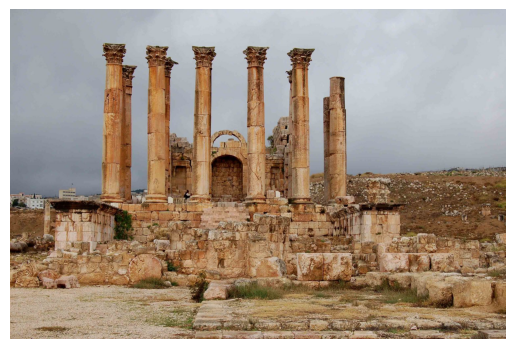

In [22]:
plt.imshow(i)
plt.axis('off')
plt.show()

In [24]:
buffer=BytesIO()

In [25]:
i.save(buffer,format='JPEG')

In [26]:
content=buffer.getvalue()

In [28]:
vision_image=vision.Image(content=content)

In [30]:
response=client.label_detection(image=vision_image)

In [31]:
response

label_annotations {
  mid: "/m/01bqvp"
  description: "Sky"
  score: 0.95450854
  topicality: 0.95450854
}
label_annotations {
  mid: "/m/0csby"
  description: "Cloud"
  score: 0.890171
  topicality: 0.890171
}
label_annotations {
  mid: "/m/05s2s"
  description: "Plant"
  score: 0.817002
  topicality: 0.817002
}
label_annotations {
  mid: "/m/03f34_"
  description: "Ancient greek temple"
  score: 0.7633713
  topicality: 0.7633713
}
label_annotations {
  mid: "/m/012ww9"
  description: "Archaeological site"
  score: 0.75521165
  topicality: 0.75521165
}
label_annotations {
  mid: "/m/01_m7"
  description: "Column"
  score: 0.72902006
  topicality: 0.72902006
}
label_annotations {
  mid: "/m/03f0h4"
  description: "Roman temple"
  score: 0.6916654
  topicality: 0.6916654
}
label_annotations {
  mid: "/m/0dvg9"
  description: "Ancient roman architecture"
  score: 0.68315536
  topicality: 0.68315536
}
label_annotations {
  mid: "/m/02ljgl"
  description: "Monument"
  score: 0.67272145
  t

In [32]:
labels=response.label_annotations

In [33]:
for label in labels:
    print(f'Label: {label.description}, Score: {label.score}')

Label: Sky, Score: 0.9545085430145264
Label: Cloud, Score: 0.8901709914207458
Label: Plant, Score: 0.81700199842453
Label: Ancient greek temple, Score: 0.7633712887763977
Label: Archaeological site, Score: 0.7552116513252258
Label: Column, Score: 0.7290200591087341
Label: Roman temple, Score: 0.6916654109954834
Label: Ancient roman architecture, Score: 0.683155357837677
Label: Monument, Score: 0.6727214455604553
Label: Ancient history, Score: 0.6685437560081482


In [34]:
response=client.landmark_detection(image=vision_image)

In [36]:
url='https://whc.unesco.org/uploads/thumbs/site_0252_0008-750-750-20151104113424.jpg'

In [37]:
i=return_image(url)

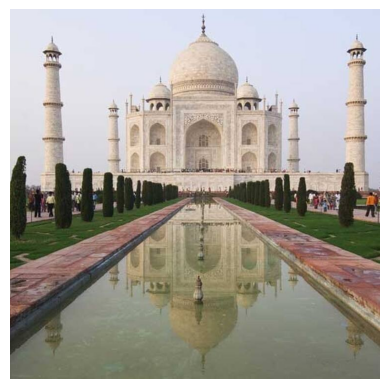

In [38]:
plt.imshow(i)
plt.axis('off')
plt.show()

In [39]:
buffer=BytesIO()
i.save(buffer,format='JPEG')
content=buffer.getvalue()
vision_image=vision.Image(content=content)

In [40]:
response=client.label_detection(image=vision_image)

In [42]:
labels=response.label_annotations

In [43]:
for label in labels:
    print(f'Label: {label.description}, Score: {label.score}')

Label: Water, Score: 0.9759376645088196
Label: Sky, Score: 0.9699932932853699
Label: Daytime, Score: 0.9462342858314514
Label: Nature, Score: 0.9020174145698547
Label: Building, Score: 0.8950650691986084
Label: Architecture, Score: 0.857284426689148
Label: World, Score: 0.8403754234313965
Label: Plant, Score: 0.8323848247528076
Label: Wonders of the world, Score: 0.8035594820976257
Label: Symmetry, Score: 0.8004530072212219


In [45]:
response=client.landmark_detection(image=vision_image)

In [49]:
marks=response.landmark_annotations

In [50]:
for landmark in marks:
        print(f"{landmark.description} (Score: {landmark.score})")

Taj Mahal (Score: 0.8580237030982971)


In [52]:
import pandas as pd

In [69]:
def return_image(url):
    response=requests.get(url)
    image_buffer=BytesIO(response.content)
    image=Image.open(image_buffer)
    return image

In [72]:
def return_vision_image(i):
    buffer=BytesIO()
    i.save(buffer,format='JPEG')
    content=buffer.getvalue()
    vision_image=vision.Image(content=content)
    return vision_image

In [53]:
def return_labels(vision_image):
    response=client.label_detection(image=vision_image)
    labels=response.label_annotations
    score=[]
    lab=[]
    for label in labels:
        lab.append(label.description)
        score.append(label.score)
    df=pd.DataFrame({'Labels':lab,'Score':score})
    return df

In [68]:
def return_landmarks(vision_image):
    response=client.landmark_detection(image=vision_image)
    landmarks=response.landmark_annotations
    name=[]
    lat=[]
    long=[]
    for landmark in landmarks:
        name.append(landmark.description)
        if landmark.locations:
            for loc in landmark.locations:
                lat.append(loc.lat_lng.latitude)
                long.append(loc.lat_lng.longitude)
        else:
            lat.append(np.nan)
            long.append(np.nan)
    df=pd.DataFrame({'Landmark':name,'Latitude':lat,'Longitude':long})
    return df

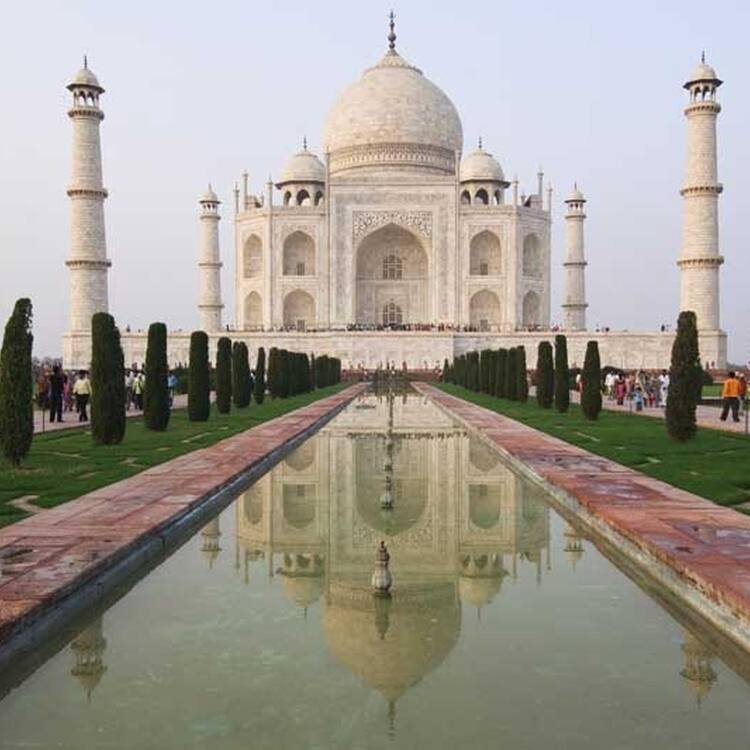

In [70]:
i

In [73]:
vision_image=return_vision_image(i)

In [74]:
labels=return_labels(vision_image)

In [75]:
labels

,Labels,Score
0,Water,0.975938
1,Sky,0.969993
2,Daytime,0.946234
3,Nature,0.902017
4,Building,0.895065
5,Architecture,0.857284
6,World,0.840375
7,Plant,0.832385
8,Wonders of the world,0.803559
9,Symmetry,0.800453


In [76]:
landmarks=return_landmarks(vision_image)

In [77]:
landmarks

,Landmark,Latitude,Longitude
0,Taj Mahal,27.175145,78.042142


In [78]:
url='https://i.natgeofe.com/n/18b80fef-63f4-4423-8da0-d99ad9b614df/babylonian-oasis-artist-rendering.jpg'

In [79]:
i=return_image(url)

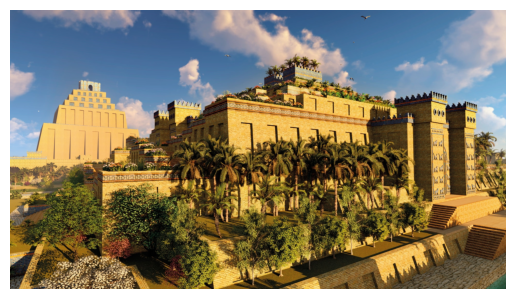

In [86]:
plt.imshow(i)
plt.axis('off')
plt.show()

In [80]:
vision_image=return_vision_image(i)

In [81]:
labels=return_labels(vision_image)

In [82]:
labels

,Labels,Score
0,Cloud,0.983691
1,Sky,0.957629
2,Plant,0.954568
3,Building,0.927926
4,Tree,0.891802
5,Vegetation,0.846877
6,Arecales,0.806970
7,House,0.798177
8,Facade,0.778255
9,City,0.773819


In [83]:
landmarks=return_landmarks(vision_image)

In [84]:
landmarks

,Landmark,Latitude,Longitude


In [87]:
url='https://cdn.britannica.com/73/114973-050-2DC46083/Midtown-Manhattan-Empire-State-Building-New-York.jpg'

In [89]:
i=return_image(url)

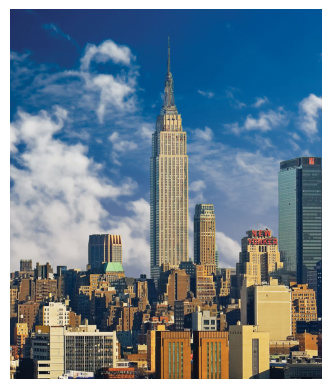

In [95]:
plt.imshow(i)
plt.axis('off')
plt.show()

In [90]:
vision_image=return_vision_image(i)

In [91]:
labels=return_labels(vision_image)

In [92]:
labels

,Labels,Score
0,Cloud,0.982686
1,Skyscraper,0.971572
2,Sky,0.964641
3,Building,0.964636
4,Daytime,0.944700
5,World,0.917361
6,Tower,0.897860
7,Tower block,0.847673
8,Urban design,0.846492
9,Condominium,0.810016


In [93]:
landmarks=return_landmarks(vision_image)

In [94]:
landmarks

,Landmark,Latitude,Longitude
0,Empire State Building,40.748441,-73.985664
